In [266]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import io
from scipy import stats

1- DF inflacion

In [267]:
df_migracionNeta = pd.read_csv("ETL ADA\df_migracion_neta.csv")

In [268]:
df_migracionNeta

,country,country_id,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Antigua y Barbuda,ATG,372.0,369.0,338.0,295.0,247.0,203.0,156.0,108.0,60.0,16.0,0.0,0.0,0.0,0.0,0.0
1,Argentina,ARG,-18051.0,-12450.0,-7869.0,-4970.0,-1011.0,3127.0,5369.0,5801.0,5522.0,5215.0,4926.0,4690.0,4478.0,2344.0,2344.0
2,Bahamas,BHS,1728.0,1476.0,1617.0,1899.0,1384.0,1048.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,1001.0,0.0,485.0
3,Barbados,BRB,19.0,296.0,75.0,-36.0,-54.0,-64.0,-65.0,-65.0,-65.0,-65.0,-65.0,-65.0,-65.0,0.0,-28.0
4,Belice,BLZ,2707.0,2702.0,2694.0,1644.0,1583.0,1529.0,1504.0,1452.0,1363.0,1283.0,1222.0,1185.0,1164.0,0.0,577.0
5,Bolivia,BOL,-13667.0,-13417.0,-13056.0,-12592.0,-12107.0,-11688.0,-11371.0,-10972.0,-10525.0,-10071.0,-9669.0,-9345.0,-8978.0,-4666.0,-4666.0
6,Brasil,BRA,-30331.0,-35373.0,-29357.0,16843.0,33631.0,43451.0,35308.0,24940.0,4764.0,82589.0,56362.0,67934.0,69186.0,56880.0,20376.0
7,Canadá,CAN,210817.0,237962.0,240878.0,227724.0,228828.0,245309.0,242475.0,195649.0,232738.0,320494.0,361274.0,417974.0,391914.0,195181.0,195181.0
8,Chile,CHL,20188.0,22516.0,24330.0,26064.0,28128.0,30925.0,36566.0,52709.0,55709.0,126525.0,214697.0,237358.0,230162.0,98439.0,113709.0
9,Colombia,COL,-49575.0,-63246.0,-46902.0,-34185.0,-46273.0,-55913.0,-64686.0,-67516.0,-41064.0,79978.0,415618.0,494364.0,395803.0,229437.0,211978.0


In [269]:
df_migracionNeta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     33 non-null     object 
 1   country_id  33 non-null     object 
 2   2007        33 non-null     float64
 3   2008        33 non-null     float64
 4   2009        33 non-null     float64
 5   2010        33 non-null     float64
 6   2011        33 non-null     float64
 7   2012        33 non-null     float64
 8   2013        33 non-null     float64
 9   2014        33 non-null     float64
 10  2015        33 non-null     float64
 11  2016        33 non-null     float64
 12  2017        33 non-null     float64
 13  2018        33 non-null     float64
 14  2019        33 non-null     float64
 15  2020        33 non-null     float64
 16  2021        33 non-null     float64
dtypes: float64(15), object(2)
memory usage: 4.5+ KB


In [270]:
#Contamos los nulos por columnas, 
print(df_migracionNeta.isna().sum(axis=0))

country       0
country_id    0
2007          0
2008          0
2009          0
2010          0
2011          0
2012          0
2013          0
2014          0
2015          0
2016          0
2017          0
2018          0
2019          0
2020          0
2021          0
dtype: int64


In [271]:
# analisis de distribucion

In [272]:
# histogramas



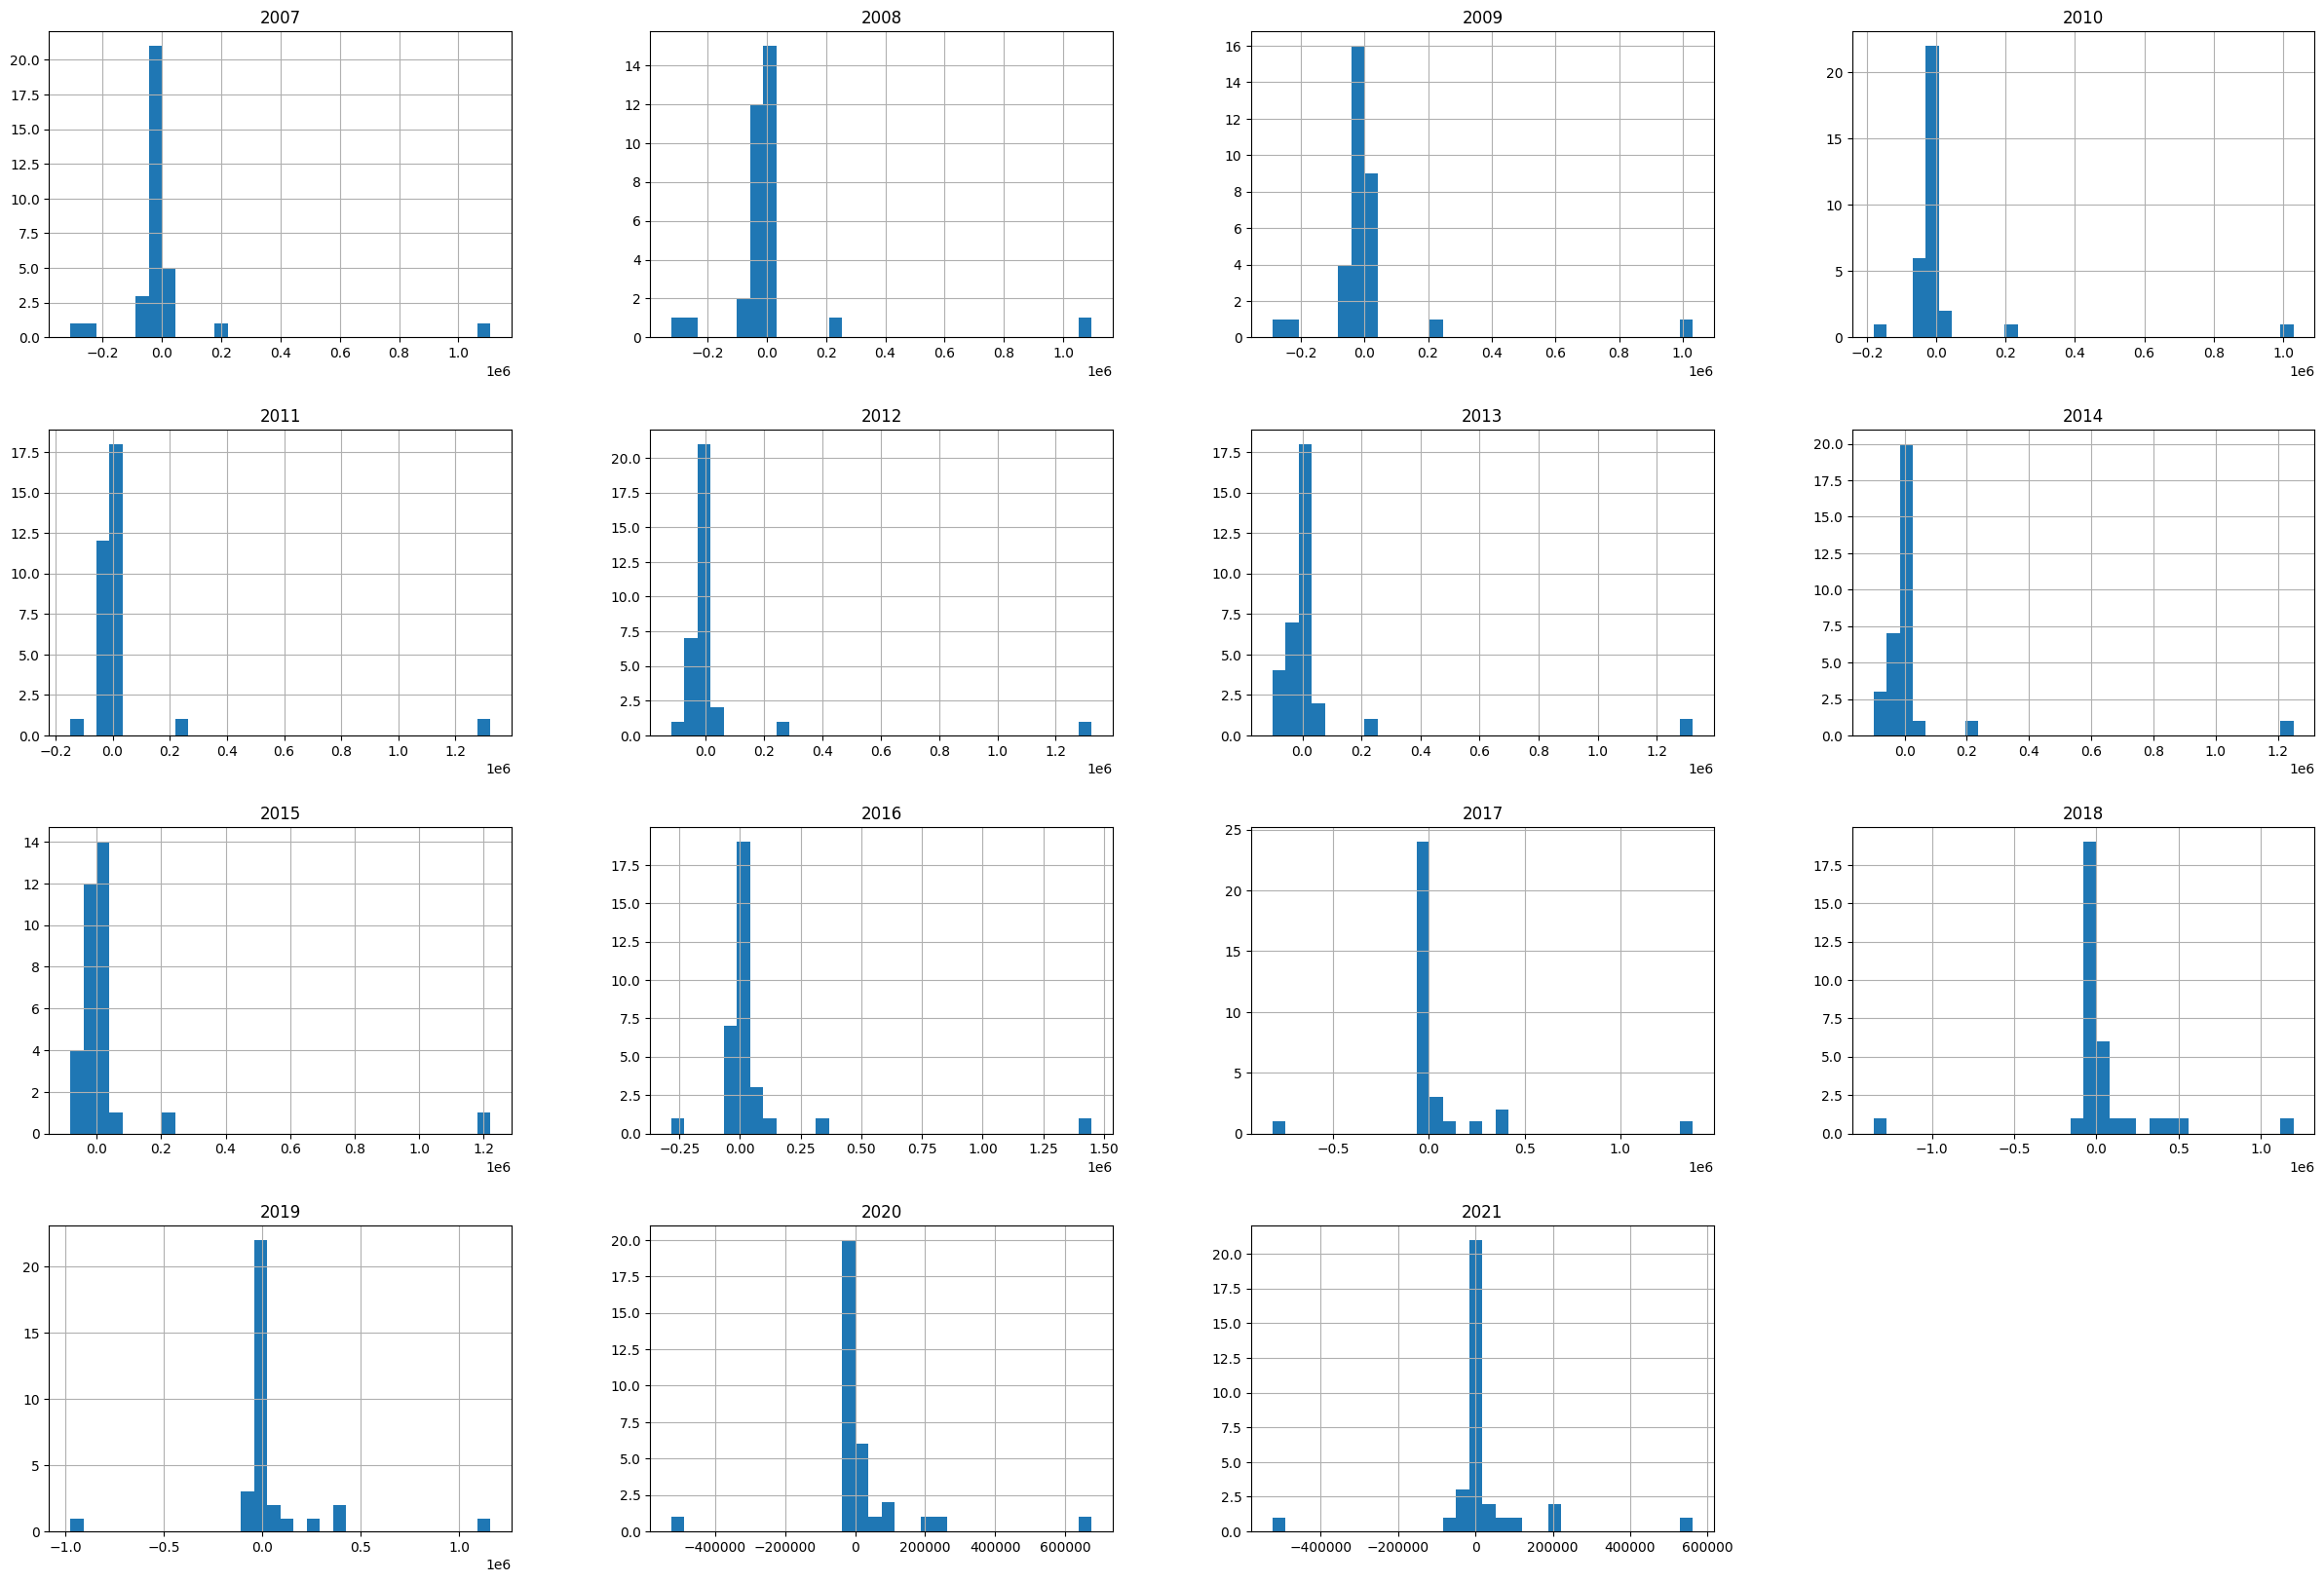

In [273]:
df_migracionNeta.hist(bins=32, figsize=(30,20))
plt.show()

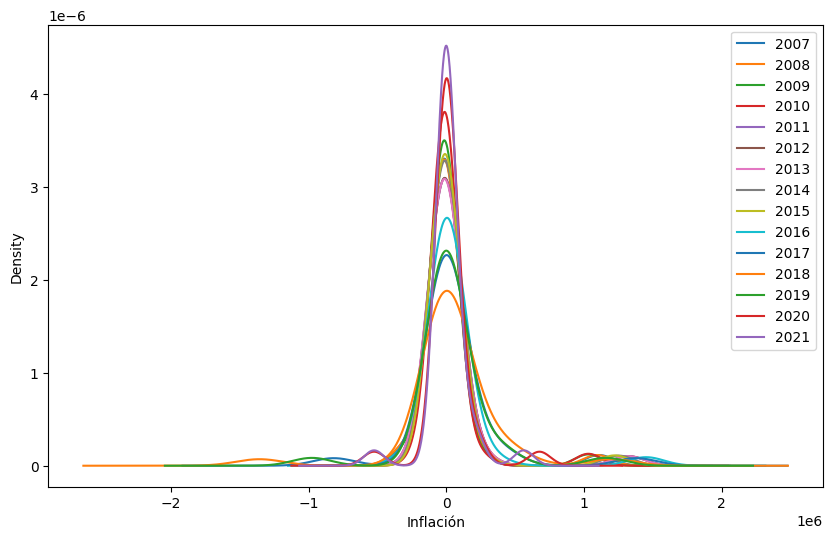

In [274]:
# diagrama de densidad 

fig, ax = plt.subplots(figsize=(10,6))
df_migracionNeta.plot(kind='density', ax=ax)
ax.set_xlabel('Inflación')
plt.show()

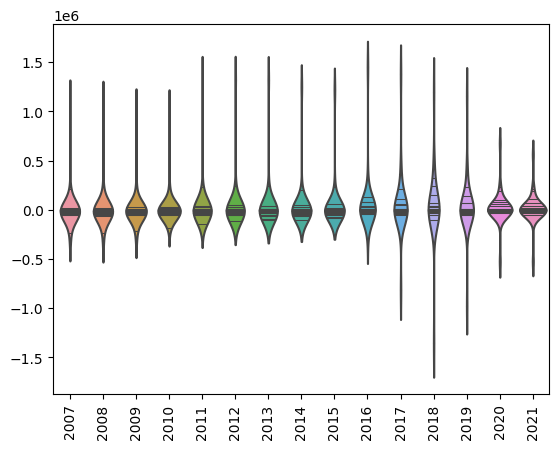

In [275]:
# Crear la gráfica de violín con los datos rotados del eje X
ax = sns.violinplot(data=df_migracionNeta.drop(columns='country'), inner='stick')
plt.xticks(rotation=90)
plt.show()

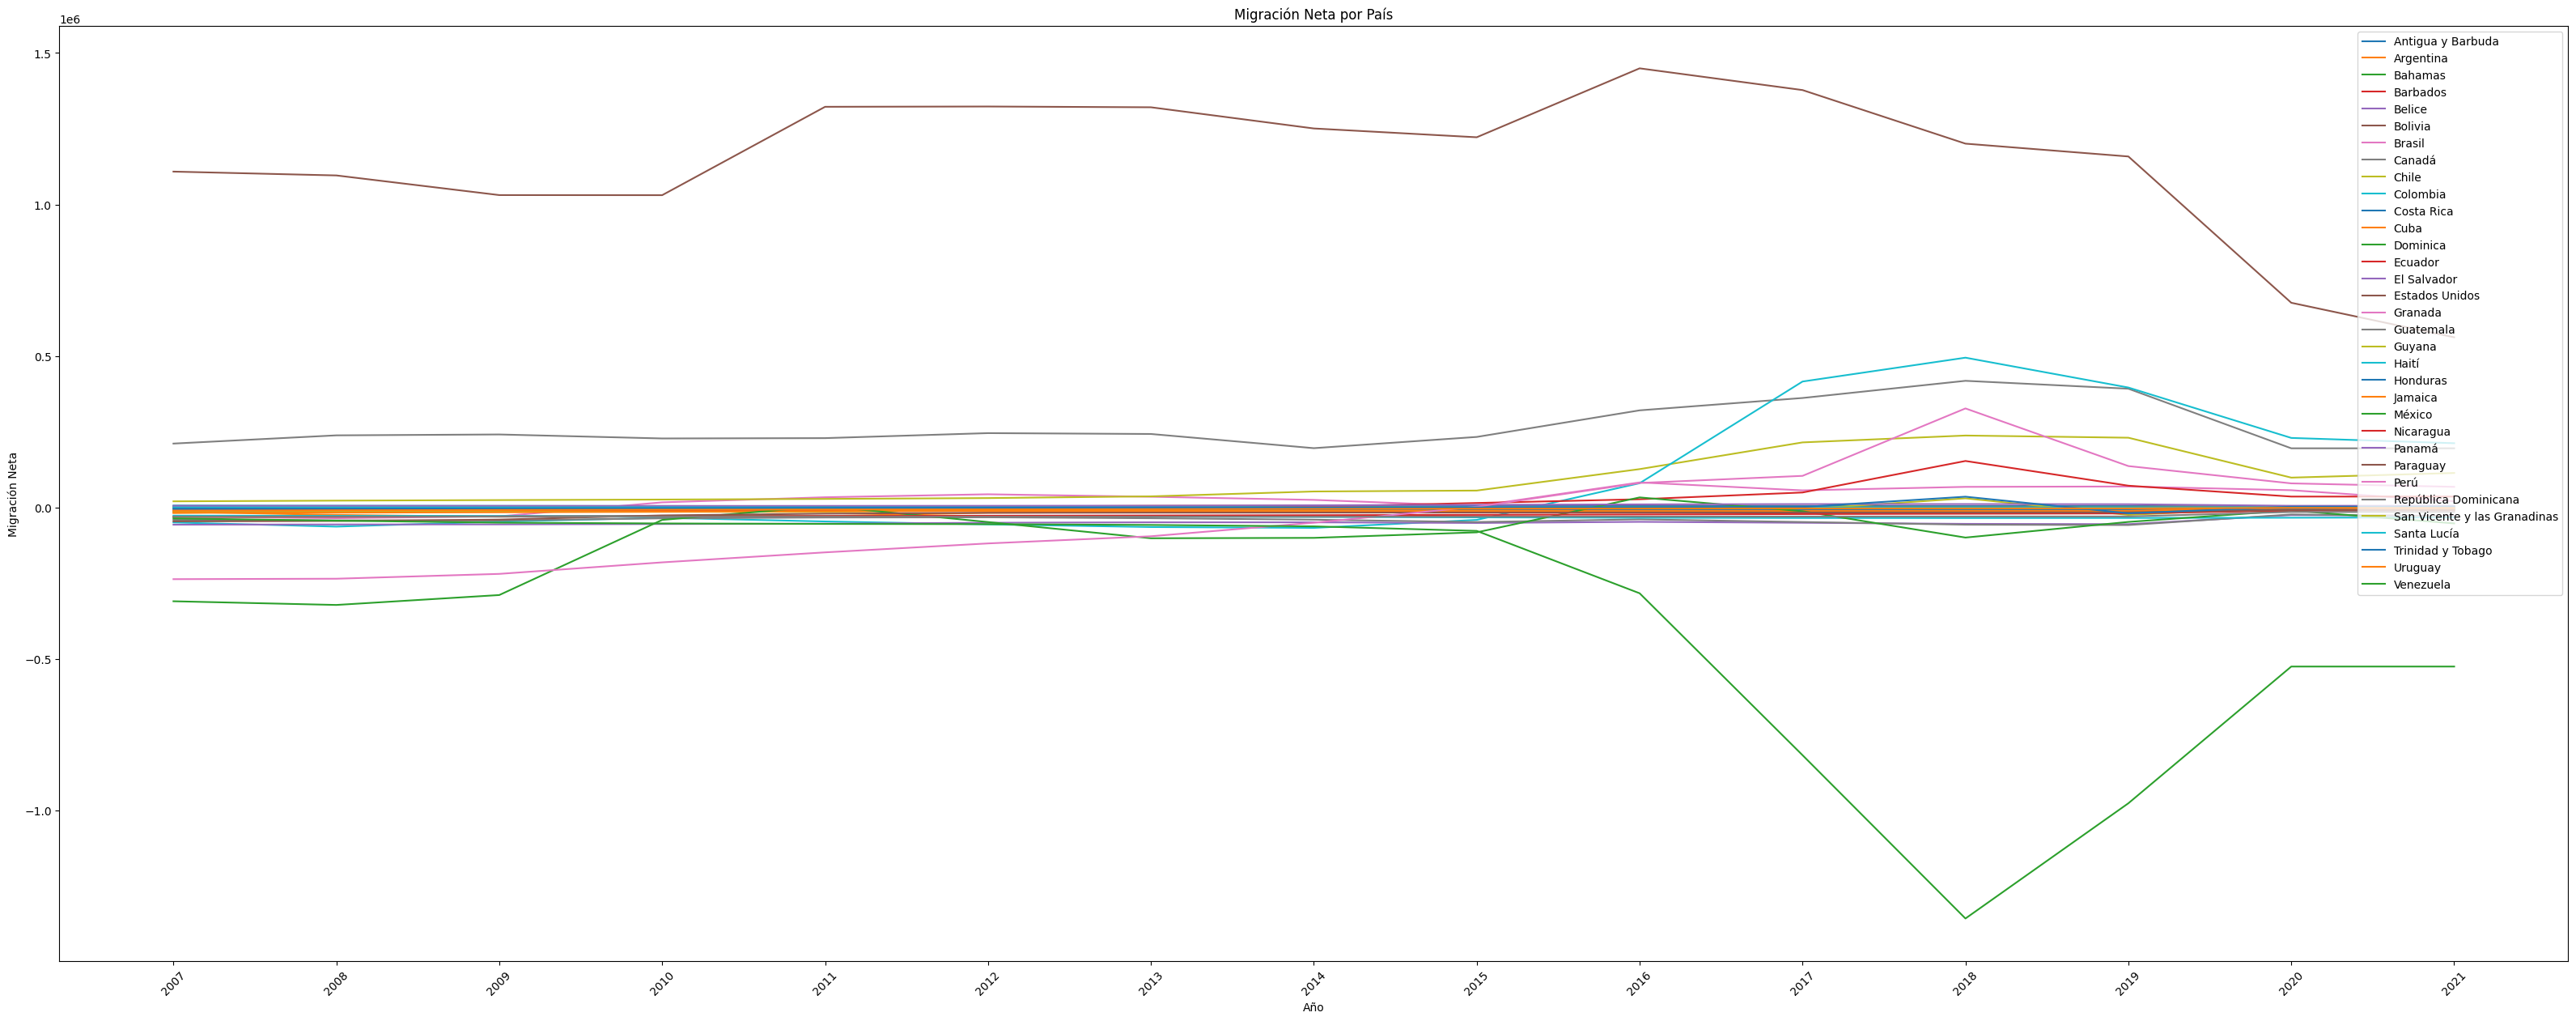

In [276]:
#diagrama de lineas 

fig, ax = plt.subplots(figsize=(40,15))

for country in df_migracionNeta['country'].unique():
    datos_pais = df_migracionNeta[df_migracionNeta['country']==country].iloc[:,2:]
    datos_pais = datos_pais.T.reset_index()
    datos_pais.columns = ['Año', 'Migración Neta']
    ax.plot(datos_pais['Año'], datos_pais['Migración Neta'], label=country)

ax.set_xticks(df_migracionNeta.columns[2:])
ax.set_xticklabels(df_migracionNeta.columns[2:], rotation=45)
ax.set_ylabel('Migración Neta')
ax.set_xlabel('Año')
ax.set_title('Migración Neta por País')
ax.legend()

plt.show()









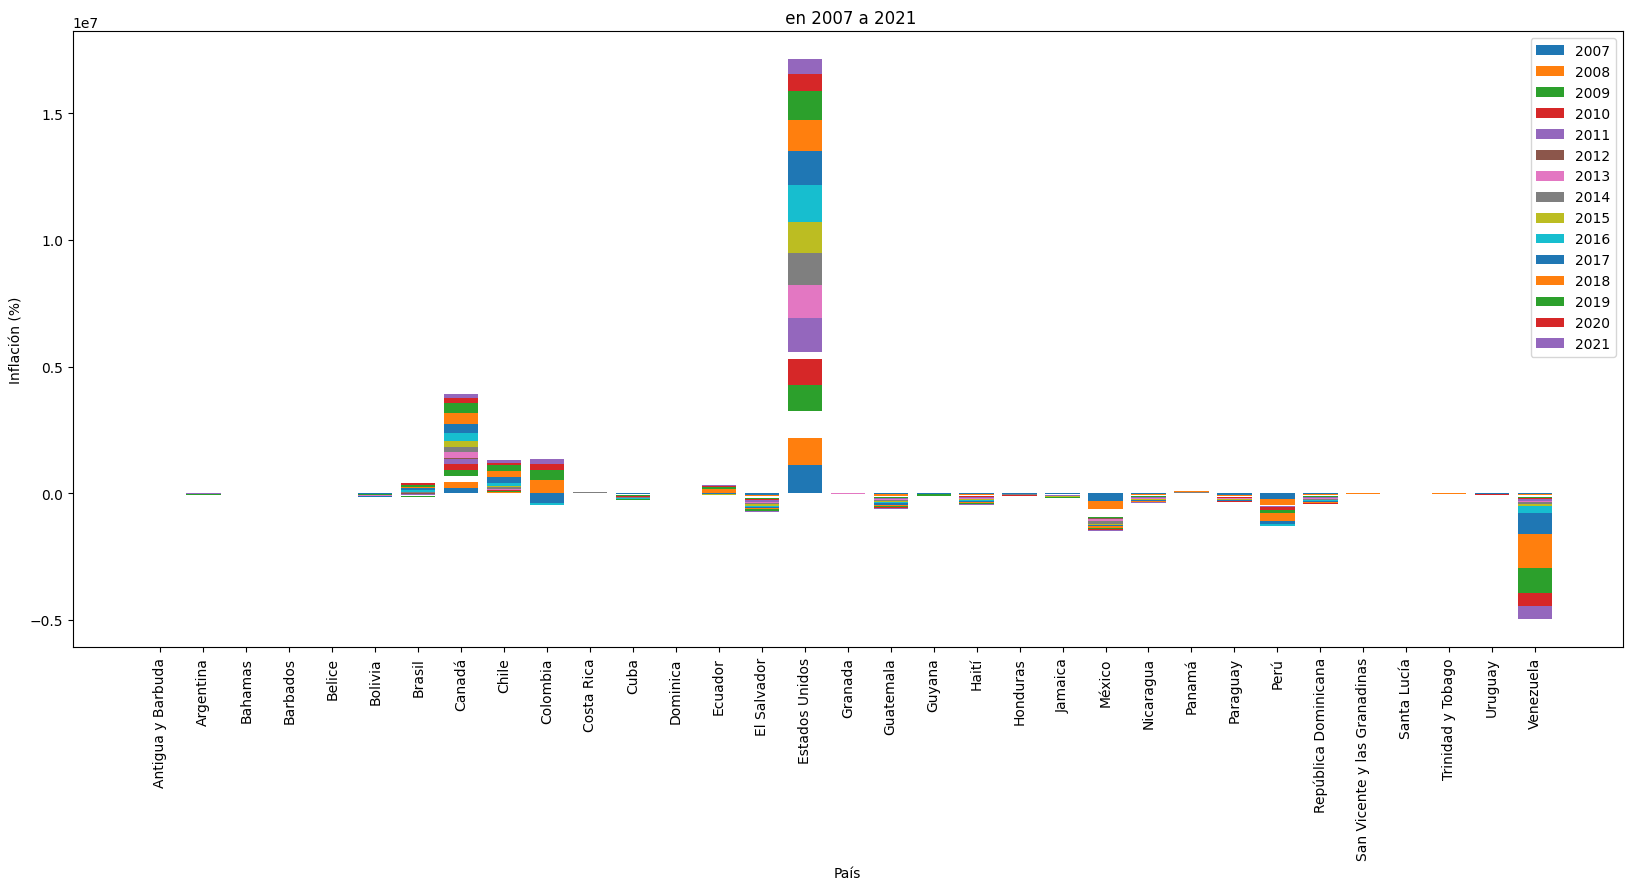

In [277]:
# diagrama de barras 


# calcular la inflación promedio de cada país en los años 2007 - 2021
inflacion_anual = df_migracionNeta[['country', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']].groupby('country').mean().reset_index()

# crear el gráfico de barras apiladas
fig, ax = plt.subplots(figsize=(20,8))
ax.bar(inflacion_anual['country'], inflacion_anual['2007'], label='2007')
ax.bar(inflacion_anual['country'], inflacion_anual['2008'], bottom=inflacion_anual['2007'], label='2008')
ax.bar(inflacion_anual['country'], inflacion_anual['2009'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009'], label='2009')
ax.bar(inflacion_anual['country'], inflacion_anual['2010'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010'], label='2010')
ax.bar(inflacion_anual['country'], inflacion_anual['2011'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011'], label='2011')
ax.bar(inflacion_anual['country'], inflacion_anual['2012'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2011'], label='2012')
ax.bar(inflacion_anual['country'], inflacion_anual['2013'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012'], label='2013')
ax.bar(inflacion_anual['country'], inflacion_anual['2014'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013'], label='2014')
ax.bar(inflacion_anual['country'], inflacion_anual['2015'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014'], label='2015')
ax.bar(inflacion_anual['country'], inflacion_anual['2016'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015'], label='2016')
ax.bar(inflacion_anual['country'], inflacion_anual['2017'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016'], label='2017')
ax.bar(inflacion_anual['country'], inflacion_anual['2018'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017'], label='2018')
ax.bar(inflacion_anual['country'], inflacion_anual['2019'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017']+inflacion_anual['2018'], label='2019')
ax.bar(inflacion_anual['country'], inflacion_anual['2020'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017']+inflacion_anual['2018']+inflacion_anual['2019'], label='2020')
ax.bar(inflacion_anual['country'], inflacion_anual['2021'], bottom=inflacion_anual['2007']+inflacion_anual['2008']+inflacion_anual['2009']+inflacion_anual['2010']+inflacion_anual['2011']+inflacion_anual['2012']+inflacion_anual['2013']+inflacion_anual['2014']+inflacion_anual['2015']+inflacion_anual['2016']+inflacion_anual['2017']+inflacion_anual['2018']+inflacion_anual['2019']+inflacion_anual['2020'], label='2021')


# personalizar el gráfico
ax.set_xlabel('País')
ax.set_ylabel('Inflación (%)')
ax.set_title(' en 2007 a 2021')
ax.legend()

ax.tick_params(axis='x', labelrotation=90)

# mostrar el gráfico
plt.show()

In [278]:
# analisis de outliers

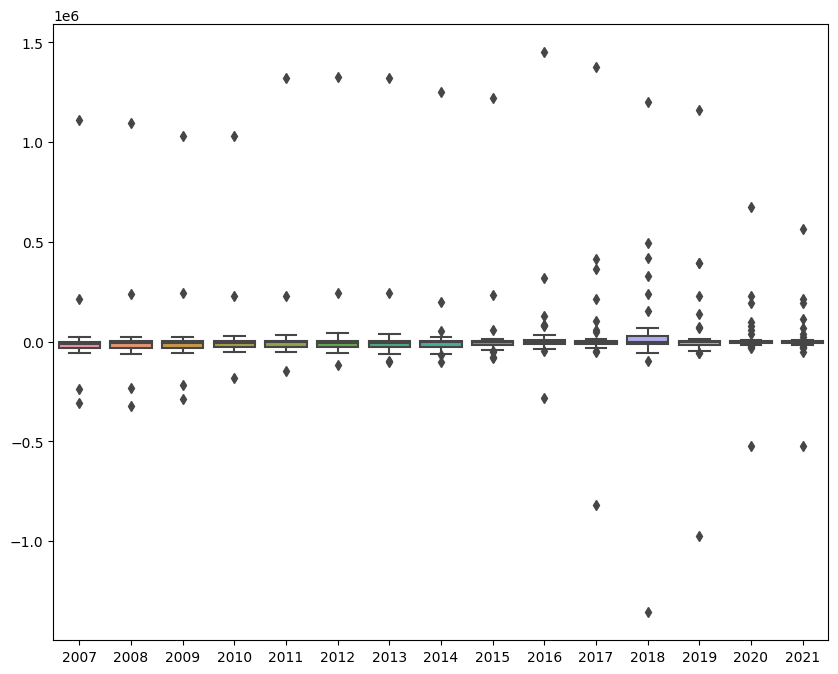

In [279]:
# Creamos un boxplot de Seaborn:

plt.figure(figsize=(10, 8))

sns.boxplot(data=df_migracionNeta.iloc[:,1:])

# Mostramos el gráfico:

plt.show()

In [280]:
df_migracionNeta = df_migracionNeta.drop('country_id', axis=1)


In [281]:


# Definimos una función para encontrar outliers
def find_outliers(data):
    # Calculamos el rango intercuartílico
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculamos los límites del bigote
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Encontramos los outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    # Devolvemos los outliers
    return outliers

# Buscamos los outliers en cada columna del DataFrame
for col in df_migracionNeta.columns[1:]:
    outliers = find_outliers(df_migracionNeta[col])
    print("Outliers en la columna", col, ":", outliers.values)

    

Outliers en la columna 2007 : [ 210817. 1108509. -309663. -236705.]
Outliers en la columna 2008 : [ 237962. 1095864. -321847. -235263.]
Outliers en la columna 2009 : [ 240878. 1031010. -289132. -219304.]
Outliers en la columna 2010 : [ 227724. 1030731. -181284.]
Outliers en la columna 2011 : [ 228828. 1322433. -148270.]
Outliers en la columna 2012 : [ 245309. 1323368. -118758.]
Outliers en la columna 2013 : [ 242475. 1320840. -101719.  -95149.]
Outliers en la columna 2014 : [ 195649.   52709.  -67516. 1250914. -100413.]
Outliers en la columna 2015 : [ 232738.   55709.  -51282. 1221849.  -48162.  -82173.  -77421.]
Outliers en la columna 2016 : [  82589.  320494.  126525.   79978.  -47499. 1449371.   80725. -283326.]
Outliers en la columna 2017 : [  56362.  361274.  214697.  415618.   49359.  -50616. 1377630.  -48049.
  104242. -817764.]
Outliers en la columna 2018 : [  417974.   237358.   494364.   153372.  1200796.   -99430.   326831.
 -1356759.]
Outliers en la columna 2019 : [  69186.

In [282]:
def find_outliers(data):
    # Calculamos el rango intercuartílico
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculamos los límites del bigote
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Encontramos los outliers y sus índices correspondientes
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_indices = outliers.index
    
    # Devolvemos los outliers y sus índices correspondientes
    return outliers, outlier_indices

In [283]:
for col in df_migracionNeta.columns[1:]:
    outliers, outlier_indices = find_outliers(df_migracionNeta[col])
    print("Outliers en la columna", col)
    print("Valores:", outliers.values)
    print("Índices:", outlier_indices.values)
    print("Países:", df_migracionNeta.loc[outlier_indices]['country'].values)
    print("")

Outliers en la columna 2007
Valores: [ 210817. 1108509. -309663. -236705.]
Índices: [ 7 15 22 26]
Países: ['Canadá' 'Estados Unidos' 'México' 'Perú']

Outliers en la columna 2008
Valores: [ 237962. 1095864. -321847. -235263.]
Índices: [ 7 15 22 26]
Países: ['Canadá' 'Estados Unidos' 'México' 'Perú']

Outliers en la columna 2009
Valores: [ 240878. 1031010. -289132. -219304.]
Índices: [ 7 15 22 26]
Países: ['Canadá' 'Estados Unidos' 'México' 'Perú']

Outliers en la columna 2010
Valores: [ 227724. 1030731. -181284.]
Índices: [ 7 15 26]
Países: ['Canadá' 'Estados Unidos' 'Perú']

Outliers en la columna 2011
Valores: [ 228828. 1322433. -148270.]
Índices: [ 7 15 26]
Países: ['Canadá' 'Estados Unidos' 'Perú']

Outliers en la columna 2012
Valores: [ 245309. 1323368. -118758.]
Índices: [ 7 15 26]
Países: ['Canadá' 'Estados Unidos' 'Perú']

Outliers en la columna 2013
Valores: [ 242475. 1320840. -101719.  -95149.]
Índices: [ 7 15 22 26]
Países: ['Canadá' 'Estados Unidos' 'México' 'Perú']

Outlie

In [284]:
# Comprender la causa de los outliers:



In [285]:
# matriz de correlacion 

In [286]:
#convertimos en datos numericos las columnas en string que vamos a necesitar.
from sklearn import preprocessing 
le = preprocessing.LabelEncoder()

In [287]:
#analizamos la correlacion entre las features (tabla matriz de correlacion)

df_migracionNeta_corr = df_migracionNeta.corr()

C:\Users\alekz\AppData\Local\Temp\ipykernel_21468\159178471.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_migracionNeta_corr = df_migracionNeta.corr()


In [288]:
# visualizo
df_migracionNeta_corr

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
2007,1.000000,0.999495,0.998948,0.974670,0.962448,0.969550,0.975361,0.971015,0.962813,0.914202,0.780700,0.591088,0.697536,0.712536,0.675198
2008,0.999495,1.000000,0.999676,0.972587,0.958798,0.966630,0.972953,0.968204,0.960670,0.911699,0.779582,0.593406,0.698876,0.712439,0.677162
2009,0.998948,0.999676,1.000000,0.975608,0.961499,0.968972,0.974773,0.969681,0.963130,0.917703,0.789935,0.605237,0.710556,0.723758,0.688776
2010,0.974670,0.972587,0.975608,1.000000,0.996326,0.995884,0.993396,0.988297,0.984235,0.959681,0.823490,0.626460,0.738076,0.756811,0.707985
2011,0.962448,0.958798,0.961499,0.996326,1.000000,0.998816,0.995850,0.993388,0.990076,0.968881,0.826202,0.628548,0.737502,0.759292,0.705365
2012,0.969550,0.966630,0.968972,0.995884,0.998816,1.000000,0.999005,0.997068,0.994272,0.970910,0.828457,0.635205,0.741677,0.762587,0.710695
2013,0.975361,0.972953,0.974773,0.993396,0.995850,0.999005,1.000000,0.998962,0.996424,0.970200,0.828740,0.639541,0.743430,0.763376,0.713811
2014,0.971015,0.968204,0.969681,0.988297,0.993388,0.997068,0.998962,1.000000,0.998081,0.972905,0.832757,0.647510,0.748070,0.768011,0.718718
2015,0.962813,0.960670,0.963130,0.984235,0.990076,0.994272,0.996424,0.998081,1.000000,0.981131,0.850138,0.673034,0.769269,0.787817,0.740518
2016,0.914202,0.911699,0.917703,0.959681,0.968881,0.970910,0.970200,0.972905,0.981131,1.000000,0.925711,0.782678,0.863486,0.879797,0.836998


<AxesSubplot: >

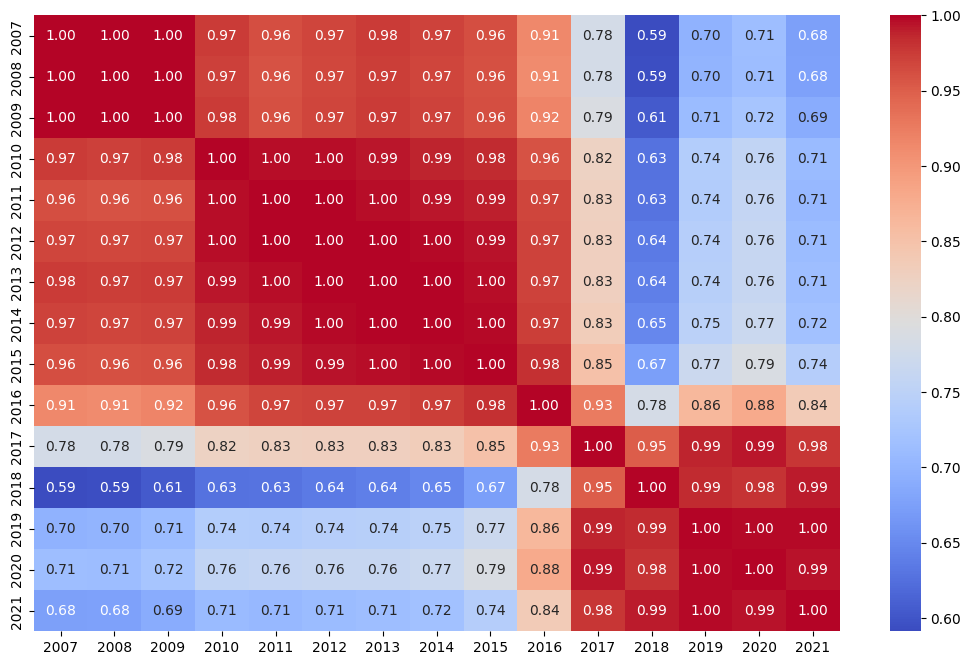

In [289]:
#Graficamos las correlaciones con un mapa de calor

plt.figure(figsize=(13,8))
sns.heatmap(df_migracionNeta_corr, cbar = True,  square = False, annot=True, fmt= '.2f',cmap= 'coolwarm') 

In [290]:
# Resumen de atributos numéricos para variables continuas
df_migracionNeta.describe()

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
count,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,33.000000,33.000000
mean,1.063355e+04,9.971333e+03,1.029797e+04,2.124455e+04,3.312176e+04,3.398185e+04,3.267755e+04,3.077491e+04,3.311136e+04,5.132709e+04,4.601461e+04,3.853127e+04,3.482727e+04,21615.848485,14852.363636
std,2.119629e+05,2.115539e+05,1.989368e+05,1.894058e+05,2.373358e+05,2.375744e+05,2.374973e+05,2.238773e+05,2.191727e+05,2.646729e+05,2.995385e+05,3.475714e+05,2.883293e+05,161145.918076,147074.438809
min,-3.096630e+05,-3.218470e+05,-2.891320e+05,-1.812840e+05,-1.482700e+05,-1.187580e+05,-1.017190e+05,-1.004130e+05,-8.217300e+04,-2.833260e+05,-8.177640e+05,-1.356759e+06,-9.764600e+05,-525142.000000,-525116.000000
25%,-3.089800e+04,-3.067500e+04,-3.032800e+04,-2.843700e+04,-2.822400e+04,-2.738800e+04,-2.658900e+04,-2.557100e+04,-1.683300e+04,-1.132900e+04,-1.243800e+04,-1.421900e+04,-1.924800e+04,-7068.000000,-7068.000000
50%,-1.075200e+04,-9.460000e+03,-8.487000e+03,-5.418000e+03,-1.665000e+03,-5.896000e+03,-5.655000e+03,-1.295000e+03,-5.830000e+02,-6.500000e+01,-6.500000e+01,0.000000e+00,-1.900000e+02,0.000000,-28.000000
75%,1.900000e+01,2.960000e+02,2.000000e+02,4.380000e+02,1.384000e+03,1.048000e+03,1.001000e+03,1.452000e+03,2.462000e+03,1.010900e+04,4.926000e+03,3.008000e+04,4.478000e+03,2370.000000,2632.000000
max,1.108509e+06,1.095864e+06,1.031010e+06,1.030731e+06,1.322433e+06,1.323368e+06,1.320840e+06,1.250914e+06,1.221849e+06,1.449371e+06,1.377630e+06,1.200796e+06,1.158444e+06,675560.000000,561580.000000
